### 패키지
---
os는 사진을 읽어오기 위해서\
%matplotlib inline은 첫 번째 줄에서 %matplotlib inline 의 역할은 notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것\
pyplot은 사진을 시각화하여 확인하기위해\
image는 사진을 픽셀화하기 위해\
face_recognition은 사진을 모델을 이용하여 비교하기위해\
numpy는 사진간의 거리(닮은정도를 재는 척도)를 연산하기 위해\
import하였습니다.

In [25]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
import face_recognition
import numpy as np

### 사진 확인 및 시각화
---
사진데이터를 들여오고 그 결과를 시각화를 통하여 확인했습니다.\
path가 두 종류인데, dir_path는 연예인 사진 경로이고, my_path는 제 사진 경로입니다.

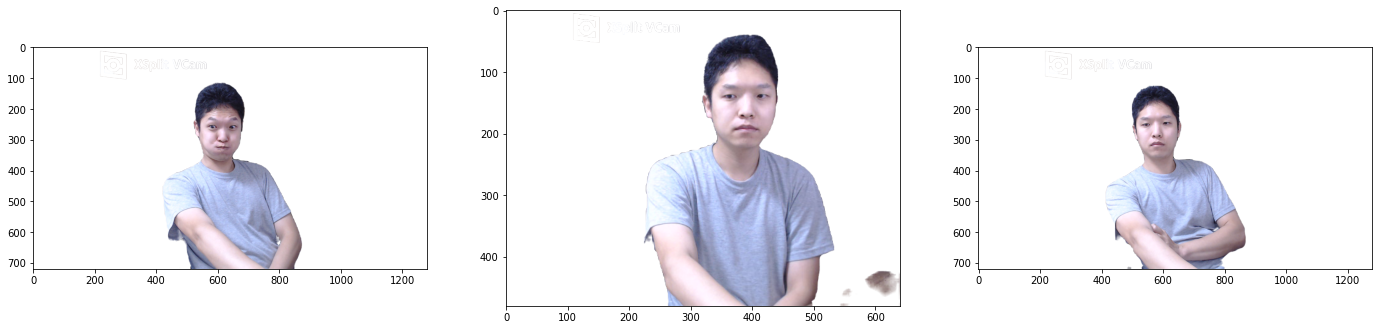

In [26]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
my_path = os.getenv('HOME')+'/aiffel/face_embedding/my_img'
file_list = os.listdir(dir_path)
my_file_list = os.listdir(my_path)

#Set figsize here
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(my_path+'/'+my_file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()


### 얼굴 추출 함수
---
사진에서 얼굴부위를 추출하는 함수입니다.\
모델에서 주요 비교부위로 쓰입니다.

In [27]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

### 추출된 얼굴부위 확인
---
추출된 얼굴을 시각화하여 확인했습니다.

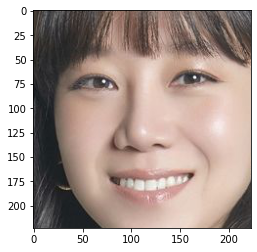

In [28]:
# image_path = my_path+'/'+'img_skc1.png'
image_path = dir_path+'/'+'공효진.jpg'
cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

### 얼굴부위 embedding 함수
---
얼굴부위를 embedding하여 파일이름과 짝으로 dict형으로 반환하는 함수입니다.\
중간의 try, except부분을 작성했는데, 이유는 연예인사진 중 오류가 발생하는 부분이 있었기 때문입니다.

In [29]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        try:
            face = get_cropped_face(img_path)
            embedding = face_recognition.face_encodings(face)
            if len(embedding) > 0:
               embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        except:
            print(file)
    return embedding_dict

### embedding 함수 실행
---
경로가 2가지이므로 2가지를 각각 생성했습니다.
확인차 출력까지 했습니다.

In [58]:
embedding_dict = get_face_embedding_dict(my_path)
embedding_dict_c = get_face_embedding_dict(dir_path)

# embedding_dict['img_skc1']

embedding_dict_c['효정']

.ipynb_checkpoints


array([-1.11206345e-01,  2.10120641e-02,  8.67938846e-02, -1.04794569e-01,
       -9.90274176e-02, -2.53571663e-02, -9.38574299e-02, -1.47312403e-01,
        1.39703348e-01, -2.03323290e-01,  1.76577792e-01, -4.18088362e-02,
       -1.41647846e-01, -1.03828730e-02, -4.82169949e-02,  2.72366107e-01,
       -2.11543694e-01, -1.88681379e-01, -8.88537616e-02,  7.58687966e-03,
       -4.91517130e-05,  9.14773419e-02, -2.62968354e-02,  6.40607253e-02,
       -1.33692056e-01, -3.74894232e-01, -1.11426979e-01, -7.71031380e-02,
       -5.36727309e-02, -7.90216494e-03, -9.96500254e-03,  9.68947783e-02,
       -1.47835866e-01,  5.35070896e-03,  9.09405649e-02,  1.23491108e-01,
        3.99204791e-02, -1.03600860e-01,  1.71316028e-01,  5.54670915e-02,
       -3.45325381e-01,  6.95744157e-02,  1.79060236e-01,  2.37338051e-01,
        2.23828167e-01, -5.89621998e-02,  5.25881536e-03, -8.93567130e-02,
        1.68012232e-01, -2.29988500e-01,  3.38076651e-02,  6.76254779e-02,
        1.50839746e-01,  

### 비유사성 함수
---
두 사진의 얼굴이 얼마나 안 닮았는지를 나타내는 함수입니다.\
넘파이를 이용하여 L2 distance를 구합니다.

In [59]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

### 함수실행
---
제 사진 3장간의 비유사성을 함수를 이용하여 값을 구해봤습니다.

In [60]:
print(get_distance('img_skc1', 'img_skc2'))
print(get_distance('img_skc2', 'img_skc3'))
print(get_distance('img_skc3', 'img_skc1'))

0.22259011963375686
0.3451395477494867
0.36108327762242076


### 함수수정
---
연예인 사진을 다른 dict로 저장했기에(경로를 나눴기때문에) 원래의 코드를 수정하였습니다.

In [61]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict_c[name2], ord=2)

### 함수구조추가
---
유사한 얼굴을 추려내는 함수에서 이용하기 위해 함수의 접근방식을 변경했습니다.

In [62]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1


### 유사 얼굴 순위 함수
---
시각화하는 부분을 추가하고, 변경된 embeddind_dict를 이용하도록 했습니다.\
시각화 부분을 작성하는 중 앞의 과정에서 파일이름에 확장자를 제거했기에,\
하드코딩한 확장자 리스트(ing_exts)와 예외처리를 합쳐서 이미지경로를 얻는 방식을 이용했습니다.

In [96]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict_c.items(), key=lambda x:sort_key_func(x[0]))
    img_exts=['.jpg', '.jpeg', '.png']
    
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            for a in img_exts:
                img_path = dir_path+'/'+sorted_faces[i][0]+a
                try:
                    image = img.imread(img_path)
                    plt.imshow(image)
                    plt.show()
                except:
                    pass

### 실행 결과
---
외거플인 것 외에 무엇을 닮았는지 이해가 안되는 연예인들의 얼굴이 순위로 매겨졌습니다.\
제 사진을 3장 찍었으므로, 각 사진을 모두 시도해서, 모두 공통적으로 포함된 스타 얼굴이 가장 닮았다고 생각하기로 했습니다.\
결과는 '조승우'가 나왔고, 저는 안 닮은 것 같지만 흡족했습니다.\
2개가 겹치는 '박보영'씨가 다음으로 닮았다는 결론인 것 같지만...\
모델에 대한 의심이 들기도 합니다.

순위 1 : 이름(RM), 거리(0.44771248999569485)


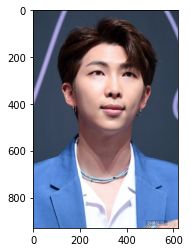

순위 2 : 이름(레드벨벳웬디), 거리(0.4517916918933705)


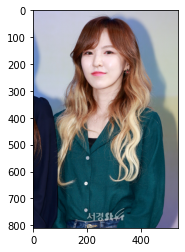

순위 3 : 이름(조승우), 거리(0.4539410089389136)


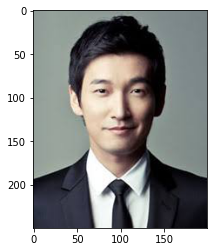

순위 4 : 이름(박보영), 거리(0.4560227154981087)


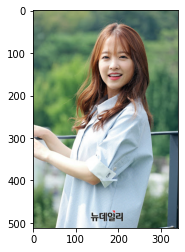

순위 5 : 이름(진), 거리(0.4598237080887495)


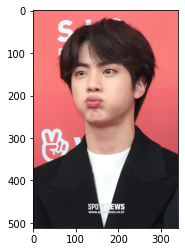

In [97]:
get_nearest_face('img_skc1')

순위 1 : 이름(이대형), 거리(0.43106270697536686)


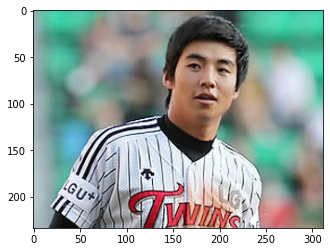

순위 2 : 이름(조승우), 거리(0.4322433161035017)


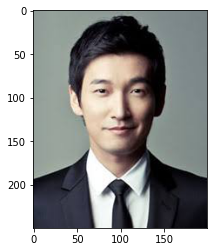

순위 3 : 이름(정수빈), 거리(0.44516166315404604)


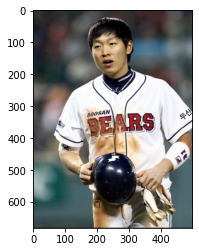

순위 4 : 이름(박정민), 거리(0.45257275228190685)


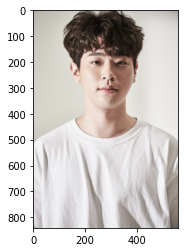

순위 5 : 이름(씨잼), 거리(0.4581493640985991)


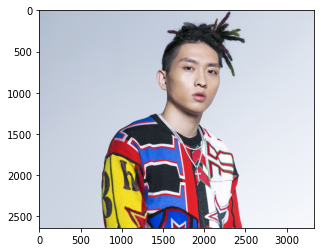

In [98]:
get_nearest_face('img_skc2')

순위 1 : 이름(박보영), 거리(0.4511909546899288)


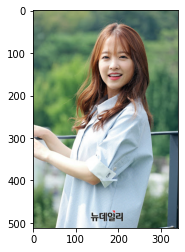

순위 2 : 이름(정수빈), 거리(0.45643642658022454)


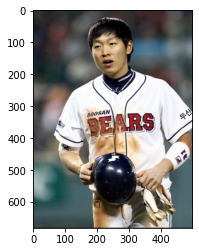

순위 3 : 이름(진), 거리(0.4652917442079123)


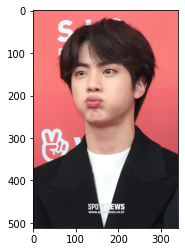

순위 4 : 이름(조승우), 거리(0.46742618321887797)


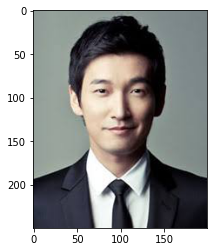

순위 5 : 이름(정국), 거리(0.4746714759328213)


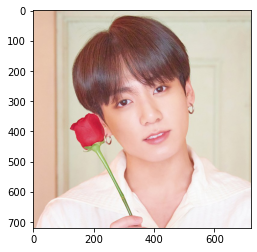

In [99]:
get_nearest_face('img_skc3')